In [1]:
import matplotlib.pyplot as plt

(0.0, 1000.0)

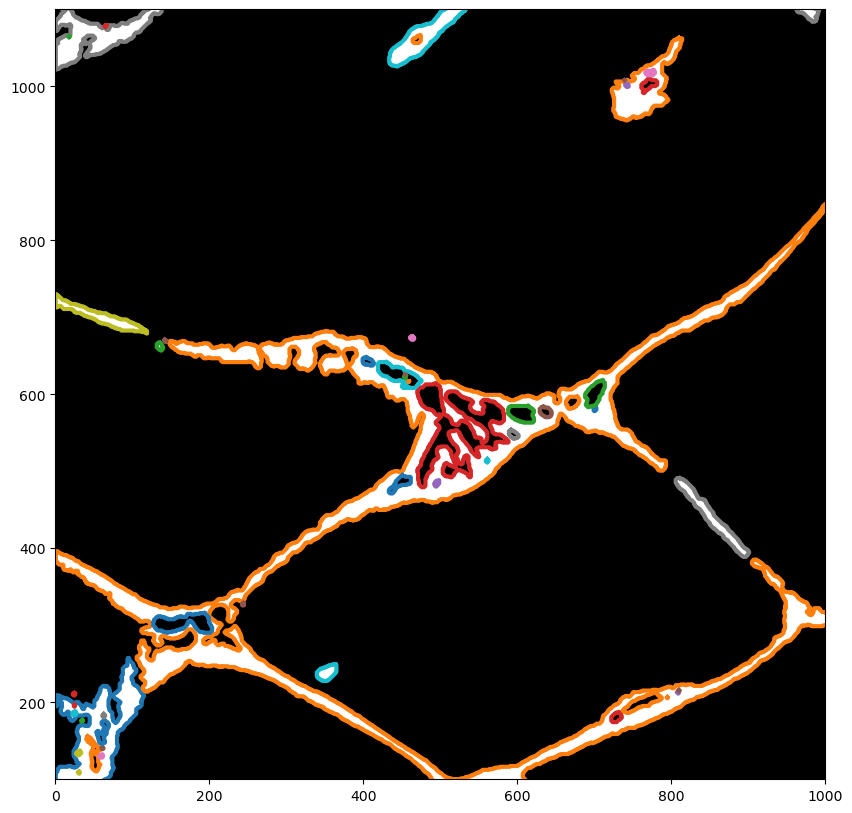

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util 
from skimage import measure
from skimage import io
import pandas as pd
from skimage import morphology
from skimage.util import invert

# Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
img=io.imread("/rwthfs/rz/cluster/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c000_r000/bnw_conv.png")

# img=io.imread("/work/mz071159/quasi-in-situ/50_45_leo/for_thresholding/5mm_3/pano50_45_eps5_leo_5mm_3_stitch_c000_r000.jpg")
# Find contours at a constant value of 0.8
# img=img[:,:,0]
img[:,0]=255
img[:,-1]=255
img[-1,:]=255
img[0,:]=255# Display the image and plot all contours found
contours = measure.find_contours(img,level=55,fully_connected='high',positive_orientation='high')
fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(r, cmap=plt.cm.gray)
ax.imshow(img,alpha=1,cmap='binary')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# # plt.show()


# img_ind=np.where(skel)
# ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)
# ax.imshow(invert(skel),cmap=mpl.cm.gray,zorder=1)
# for contour in conts:
    # ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

x=100
y=0# ax.scatter(img_ind[1],img_ind[0],s=0.05,color='black')
ax.set_ylim(x,x+1000)
ax.set_xlim(y,y+1000)

In [257]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat, disk)
footprint = disk(15)
# dilation=dilation(img==0, footprint)

# closing= closing(invert(img), footprint)


In [294]:
dilation2=scipy.ndimage.binary_dilation(img==0,disk(5),iterations=3)

(0.0, 1000.0)

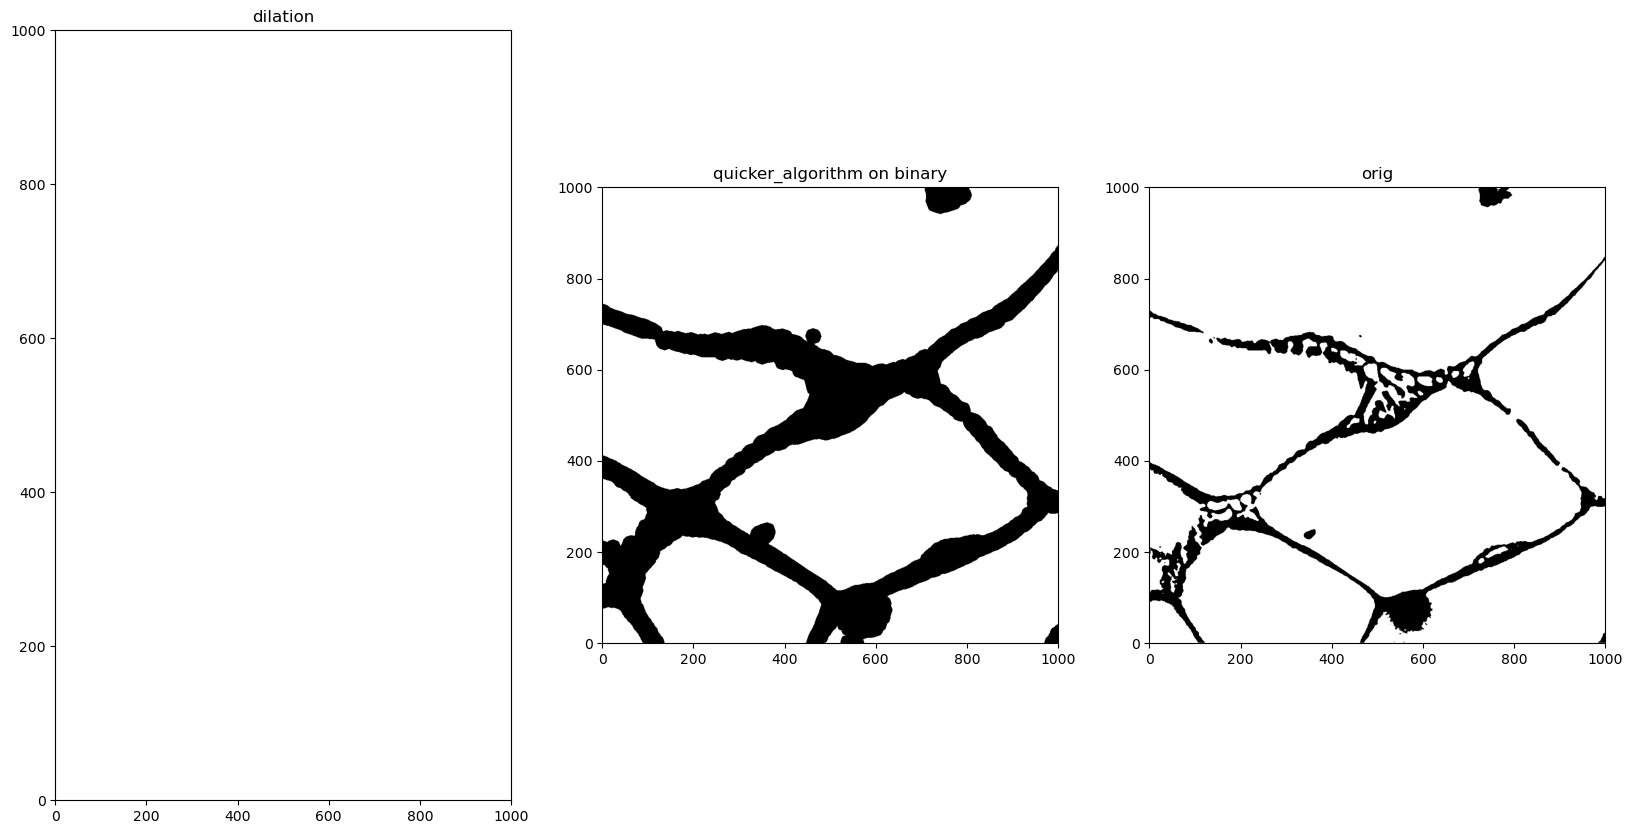

In [295]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
# ax[0].imshow(dilation,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
ax[1].imshow(dilation2,cmap='binary')
ax[1].set_title('quicker_algorithm on binary')
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,1000])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1000])
ax[2].set_ylim([0,1000])

(0.0, 1000.0)

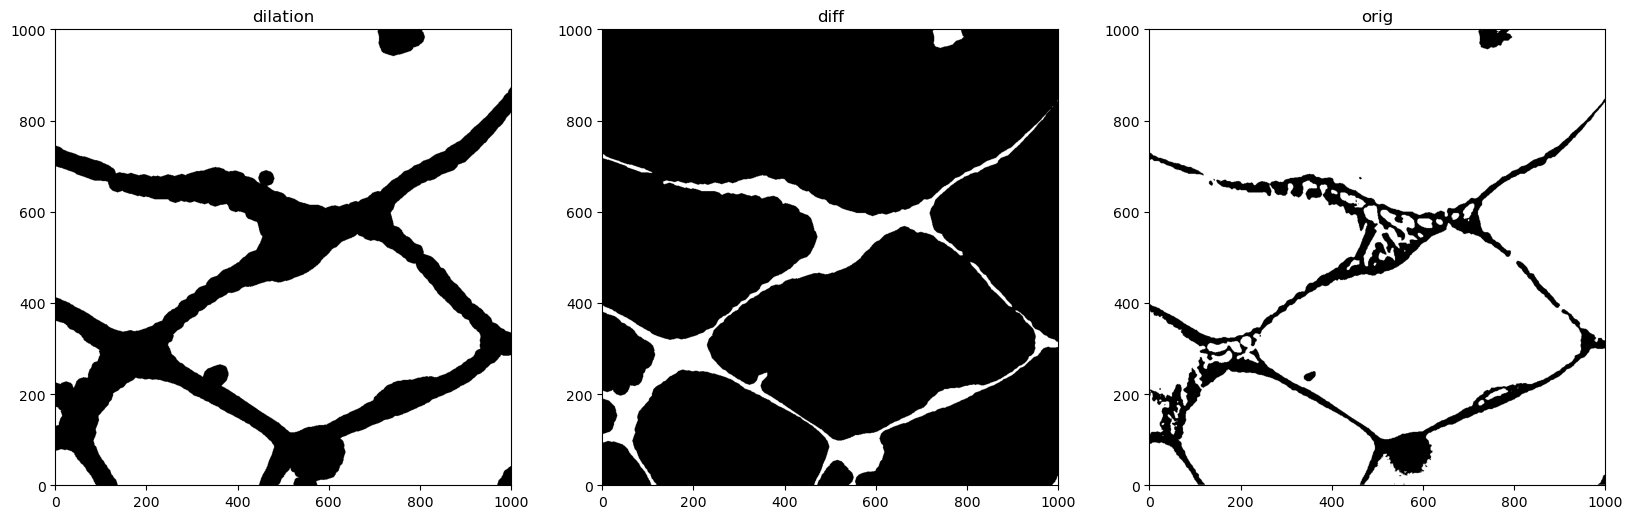

In [353]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(dilation2,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
footprint = disk(15)
#erosion=erosion(dilation, footprint)
erosion2=scipy.ndimage.binary_dilation(invert(dilation2),disk(6),iterations=3)
ax[1].imshow(erosion2,cmap='binary')
ax[1].set_title('diff')
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,1000])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1000])
ax[2].set_ylim([0,1000])

(0.0, 1500.0)

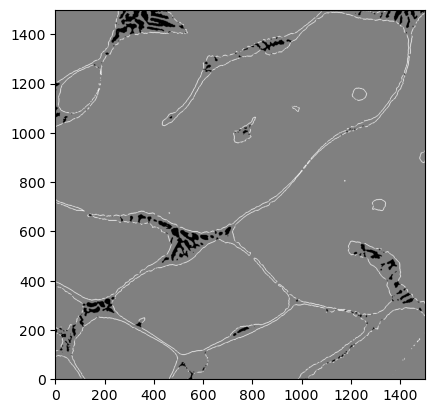

In [354]:
plt.imshow(erosion2-invert(img),cmap='gray')
plt.xlim([0,1500])
plt.ylim([000,1500])

In [355]:
border=dilation-erosion
border=border!=0

TypeError: unsupported operand type(s) for -: 'function' and 'function'

In [348]:
border

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [359]:
np.unique(eutectic_mask)

array([0, 1, 2], dtype=uint8)

In [364]:
eutectic_mask=erosion2-invert(img)
eutectic_mask=eutectic_mask==0

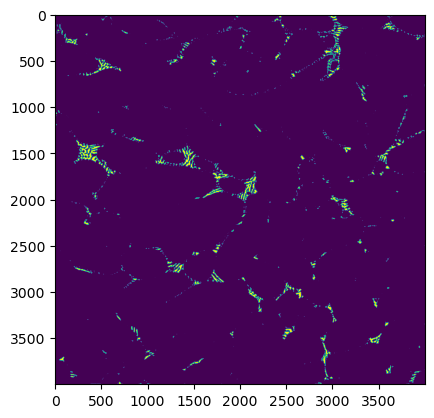

In [365]:
plt.imshow(eutectic_mask)

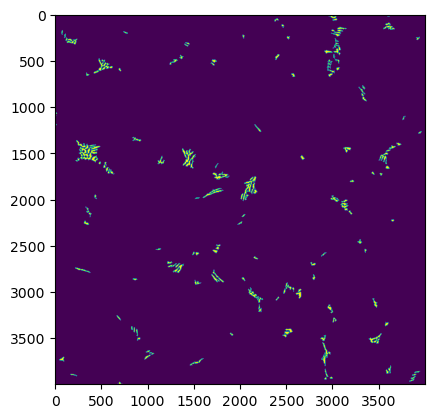

In [366]:
mg_eut_filtered=morphology.remove_small_objects(eutectic_mask,min_size=400)
plt.imshow(mg_eut_filtered)
# plt.xlim([1000,2500])
# plt.ylim([1000,2500])

In [367]:
mg_primary=dilation2==0

In [268]:
mg_primary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [368]:
total_ms=np.zeros((4000,4000))
# total_ms[mg_primary]=1
total_ms[img==0]=1
total_ms[mg_eut_filtered]=2

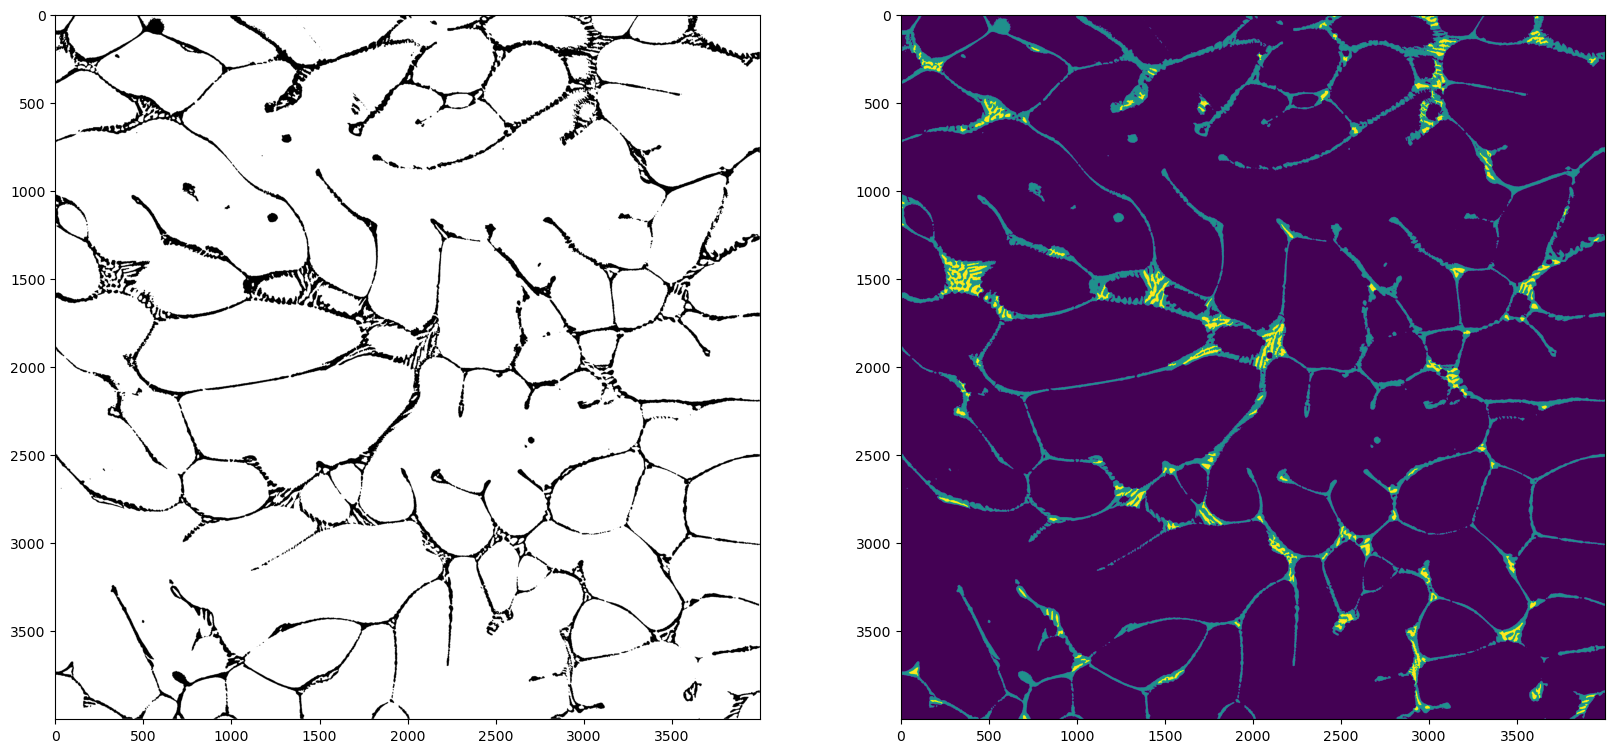

In [369]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap='gray')
# ax[0].set_xlim([1000,2500])
# ax[0].set_ylim([1000,2500])
ax[1].imshow(total_ms)
# ax[1].set_xlim([1000,2500])
# ax[1].set_ylim([1000,2500])

In [379]:
import matplotlib.pyplot as plt

In [ ]:
mg_holes_removed=morphology.remove_small_holes(mg_primary==True,50000)

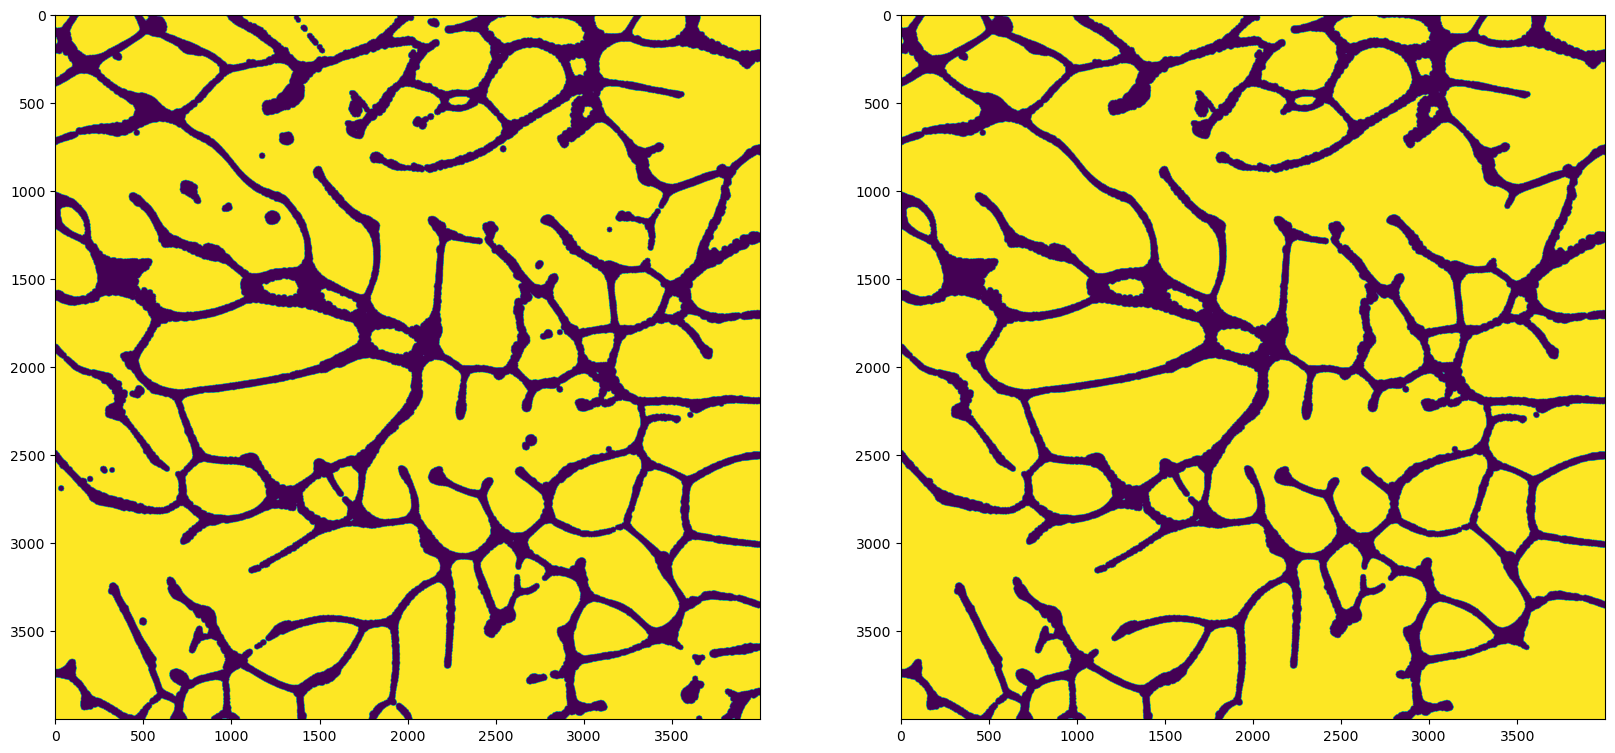

In [381]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(mg_primary)
ax[1].imshow(mg_holes_removed)

In [383]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
label_img = label(mg_holes_removed)
regions = regionprops(label_img)

In [384]:
skel=skeletonize(mg_holes_removed)

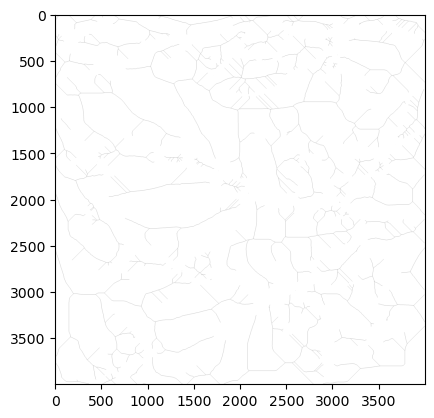

In [385]:
plt.imshow(skel,cmap='binary')

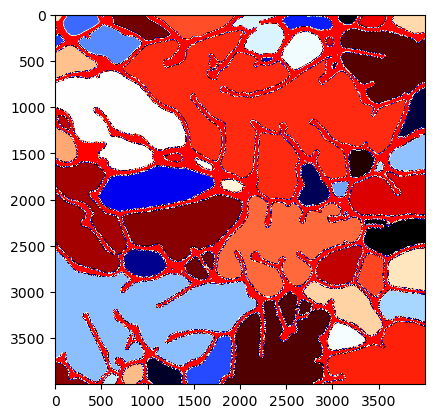

In [387]:
plt.imshow(label_img,cmap='flag')

In [388]:
dilation_skel=scipy.ndimage.binary_dilation(skel!=0,disk(5),iterations=2)

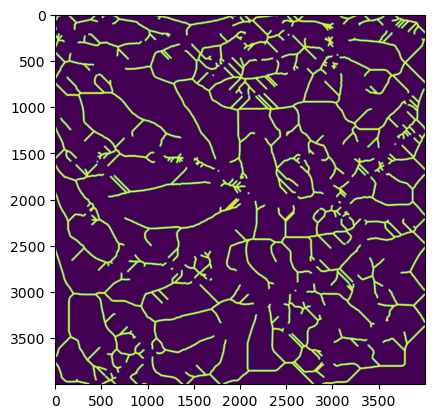

In [389]:
plt.imshow(dilation_skel)

In [390]:
# skel2, distance = morphology.medial_axis(mg_holes_removed, return_distance=True)

(0.0, 2000.0)

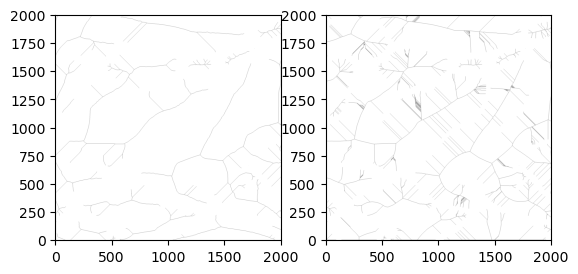

In [391]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(skel,cmap='binary')
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,2000])
ax[1].imshow(skel2,cmap='binary')
ax[1].set_xlim([0,2000])
ax[1].set_ylim([0,2000])

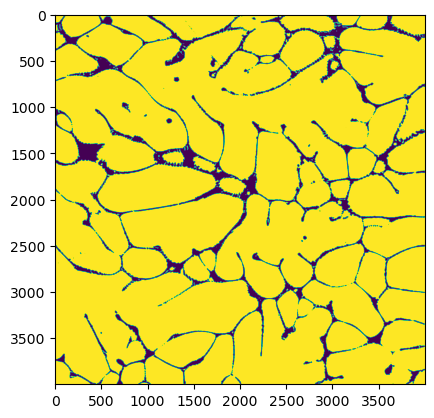

In [392]:
plt.imshow(total_ms==0)

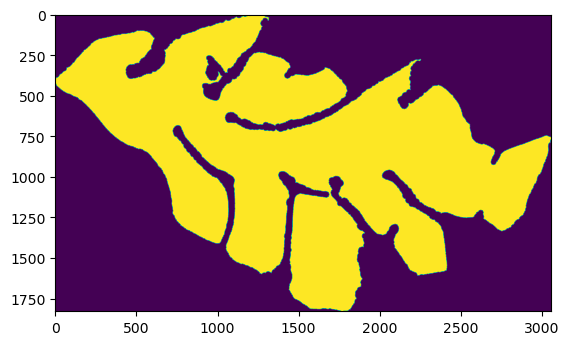

In [395]:
plt.imshow(regions[13].image)

In [408]:
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon


new_hand = approximate_polygon(regions[13].image, tolerance=0.02)


ValueError: too many values to unpack (expected 2)

In [403]:
cons

[array([[4.1650e+02, 0.0000e+00],
        [4.1600e+02, 5.0000e-01],
        [4.1500e+02, 5.0000e-01],
        ...,
        [5.0000e-01, 1.2760e+03],
        [5.0000e-01, 1.2770e+03],
        [0.0000e+00, 1.2775e+03]]),
 array([[0.0000e+00, 1.2815e+03],
        [5.0000e-01, 1.2820e+03],
        [5.0000e-01, 1.2830e+03],
        ...,
        [7.5750e+02, 3.0560e+03],
        [7.5800e+02, 3.0565e+03],
        [7.5850e+02, 3.0570e+03]]),
 array([[1.8280e+03, 1.7635e+03],
        [1.8275e+03, 1.7630e+03],
        [1.8275e+03, 1.7620e+03],
        ...,
        [4.2250e+02, 1.0000e+00],
        [4.2200e+02, 5.0000e-01],
        [4.2150e+02, 0.0000e+00]]),
 array([[ 467.5, 2192. ],
        [ 467. , 2191.5],
        [ 466.5, 2192. ],
        [ 467. , 2192.5],
        [ 467.5, 2192. ]]),
 array([[ 769.5, 3057. ],
        [ 770. , 3056.5],
        [ 771. , 3056.5],
        ...,
        [1827.5, 1779. ],
        [1827.5, 1778. ],
        [1828. , 1777.5]]),
 array([[1595.5, 1335. ],
        [1595.

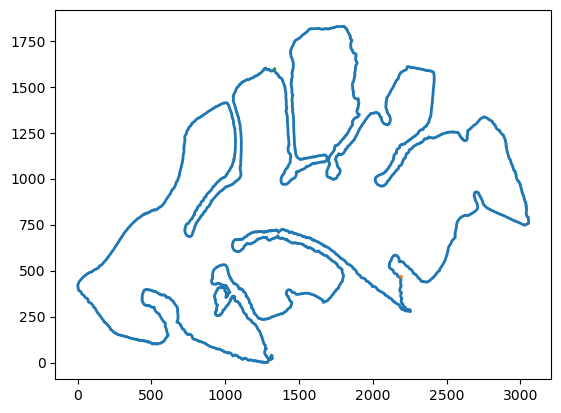

In [423]:
imgi=regions[13].image
imgi[:,0]=0
imgi[:,-1]=0
imgi[-1,:]=0
imgi[0,:]=0
cons=find_contours(imgi,fully_connected='low',positive_orientation='low')
fig, ax = plt.subplots()
# ax.imshow(r, cmap=plt.cm.gray)
for contour in cons:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [426]:
cons[0]

array([[1827.5, 1803. ],
       [1827.5, 1802. ],
       [1827.5, 1801. ],
       ...,
       [1826.5, 1804. ],
       [1827. , 1803.5],
       [1827.5, 1803. ]])

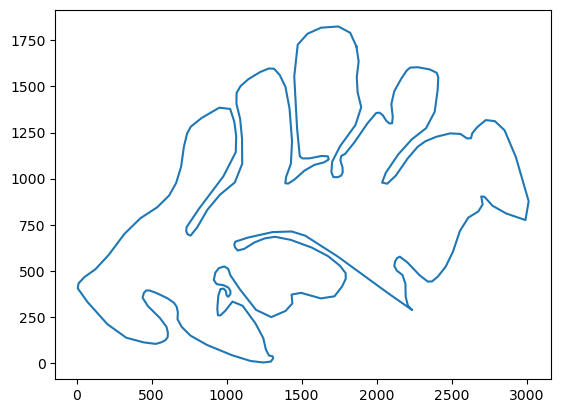

In [442]:
coords = approximate_polygon(cons[0], tolerance=2.5)
# plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
coords2 = approximate_polygon(cons[0], tolerance=20)
# plt.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
sub=subdivide_polygon(coords2, degree=2, preserve_ends=True)
plt.plot(sub[:,1],sub[:,0])

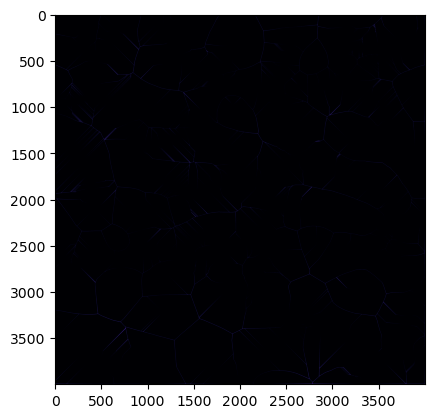

In [ ]:
plt.imshow(dist_on_skel, cmap='magma')
# ax[1].contour(blobs, [0.5], colors='w')
# ax[1].set_title('medial_axis')
# ax[1].axis('off')